### Importing the packages

In [ ]:
import sys
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

### Loading the dataset

In [ ]:
df = pd.read_csv("/content/Data Set A3.csv",encoding='latin-1')
df = df.iloc[:,[0,5]]
df

,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
42367,0,I wish Eric Draven was real.
42368,0,exam time
42369,0,is gettin sick! Damn! Go figure I have big wee...
42370,0,Had to leave after shooting 1st 3 songs of Dea...


### Data Preprocessing

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

""" Make sure that the text parameter and return variable are of string type. """
def preprocess_article(text: str) -> str:


    # Remove twitter handles
    text = re.sub('@[^\s]+','',text)
     # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove hashtags
    text = re.sub(r'\B#\S+','',text)
    # Remove URLs
    text = re.sub(r"http\S+", "", text)

    # Remove newlines and \r characters.
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')

    # Remove quotes
    text = text.replace('"', ' ')


    # Convert text to lowercase.
    text = text.lower()

    # Remove punctuation and many special characters.
    text = text.translate(str.maketrans('', '', '!?:\';.,[]()@#$%^&*£+-/\\,='))

    # Remove terminating 's characters.
    text = text.replace("'s", "")

    # Remove stop words. Note: do this first and then lemmatize because lemmatizing
    # can change words like 'has' to 'ha'.
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lematize text with WordNetLemmatizer().
    text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split(' ')])

    # Remove all words with numbers in them (ie. 400bn, 512kbps etc.) .
    text = re.sub(r'\w*\d\w*', '', text).strip()
    return text

In [ ]:
final_df = pd.DataFrame()
final_df['tweets'] = df.iloc[:,1].apply(preprocess_article)
final_df['labels']= df.iloc[:,0]
del df

In [ ]:
final_df

,tweets,labels
0,upset update facebook texting result school to...,0
1,dived time ball managed save rest bound,0
2,body feel itchy like,0
3,behaving im mad,0
4,crew,0
...,...,...
1599994,just woke having school best feeling,4
1599995,thewdbcom cool hear old walt interview,4
1599996,ready mojo makeover ask detail,4
1599997,happy birthday boo alll time tupac amaru shakur,4


labels
4    800000
0    799999
Name: count, dtype: int64


<Axes: ylabel='count'>

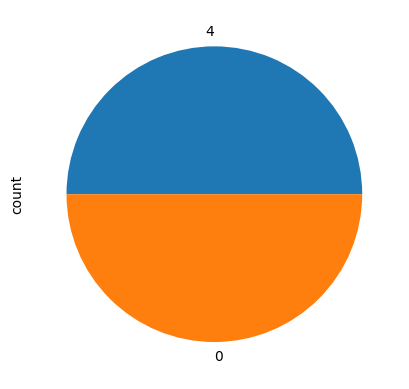

In [ ]:
### check the class dictribution
print(final_df['labels'].value_counts())
final_df['labels'].value_counts().plot.pie()

### Modelling

In [ ]:
X = final_df['tweets']
y = final_df['labels']

In [ ]:
# Create a BOW
bow_vectorizer = CountVectorizer(ngram_range=(1, 2),max_features=300)

# Fit and transform the documents
X= bow_vectorizer.fit_transform(X)

In [ ]:
le = LabelEncoder()
y= le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3
)



In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)



    #y_pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

### AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(
    random_state=1
)
ab_classifier.fit(
    X_train, y_train
)
## check performance on train data
ab_classifier_train = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_train

,Accuracy,Recall,Precision,F1
0,0.66086,0.883693,0.611144,0.722572


In [ ]:
# check performance on test data
ab_classifier_test = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_test

,Accuracy,Recall,Precision,F1
0,0.661221,0.884107,0.611808,0.723174


### Gradient Boosting

In [ ]:
gb_classifier = GradientBoostingClassifier(
    random_state=1
)
gb_classifier.fit(
    X_train, y_train
)

GradientBoostingClassifier(random_state=1)

In [ ]:
## check performance on train data
gb_classifier_train = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_train

,Accuracy,Recall,Precision,F1
0,0.668078,0.870602,0.619495,0.723891


In [ ]:
# check performance on test data
gb_classifier_test = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_test

,Accuracy,Recall,Precision,F1
0,0.668183,0.870442,0.620047,0.724212
